In [ ]:
! rm -rf sample_data

! pip install gensim

In [ ]:
import gensim.downloader as api
# Load the vector model 
GoogleWord2Vec = api.load('word2vec-google-news-300')

[=================================================-] 99.8% 1659.6/1662.8MB downloaded


In [ ]:
import gensim
ConceptNetWord2Vec = gensim.models.KeyedVectors.load_word2vec_format('numberbatch-en-19.08.txt.gz', binary=False)

# Get the word vector for a specific word
word_vector = ConceptNetWord2Vec['cats']

# Find similar words
similar_words = ConceptNetWord2Vec.most_similar('dogs')
print(similar_words)

[('smell_fear', 0.9649326801300049), ('sense_fear', 0.9622007608413696), ('guide_blind', 0.9443532228469849), ('smell_food', 0.9429340362548828), ('hunt_foxes', 0.938109815120697), ('wear_sweater', 0.9220687747001648), ('sense_danger', 0.9180392026901245), ('dog', 0.8874358534812927), ('canis_familiaris', 0.8844647407531738), ('playing_dead', 0.8844647407531738)]


In [ ]:
def find_top5(vectors, word):
    similar = vectors.most_similar(positive=[word], topn=10)
    top5 = []
    for w, sim in similar:
      if w.lower() != word:
        top5.append(w)
    return top5[:5]

find_top5(GoogleWord2Vec, "picnic")

['picnics', 'picnic_lunch', 'potluck_picnic', 'picnic_supper', 'picnicking']

In [ ]:
def find_other(vectors, words):
    other = vectors.doesnt_match(words)
    return other

find_other(GoogleWord2Vec, ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

In [ ]:
def solve_analogy(vectors, word1, word2, word3):
    # Returns word4 such that word1:word2::word3:word4
    similar = vectors.most_similar( positive=[vectors[word2], vectors[word3]], negative=[vectors[word1]],topn=10) 
    for w, sim in similar:
      if w.lower() not in [word1, word2, word3]:
        word4 = w
        return word4

solve_analogy(GoogleWord2Vec, "man", "king", "woman")

'queen'

#Polysemy

Bank:

* Financial institution (e.g., "I need to go to the bank to deposit my paycheck.")
* The side of a river (e.g., "We sat on the bank of the river and enjoyed the view.") \\

Bat:

* Nocturnal flying mammal (e.g., "I saw a bat flying around the park last night.")
* Sports equipment used in baseball (e.g., "He swung the bat and hit a home run.") \\

Book:

* Physical object with pages (e.g., "I love reading a good book.")
* To reserve or make an appointment (e.g., "I booked a table at the restaurant for tonight.") \\

Mouse:

* Small rodent (e.g., "I saw a mouse running across the floor.")
* Computer input device (e.g., "Move the cursor with the mouse.") \\

Crane:

* Large bird with long legs and neck (e.g., "We spotted a crane in the wetlands.")
* Machine used for lifting heavy objects (e.g., "The construction site had a crane for moving materials.")

Pitch:

* Sticky substance (e.g., "The tar on the road had a sticky pitch.")
* The highness or lowness of a musical tone (e.g., "Her singing voice has a beautiful pitch.")

Rock:

* Solid mineral substance (e.g., "She found a shiny rock on the beach.")
* A genre of music (e.g., "I enjoy listening to classic rock.")

Seal:

* Aquatic mammal (e.g., "We saw seals swimming in the ocean.")
* A device for closing or securing something (e.g., "Please seal the envelope before mailing it.")

...

In [ ]:
polysemy_words = ['bank', 'bat', 'book', 'mouse', 'crane', 'pitch', 'rock', 'seal']

for word in polysemy_words:
  print('Word: ', word)
  print(GoogleWord2Vec.most_similar(positive=[word], topn=5))

Word:  bank
[('banks', 0.7440759539604187), ('banking', 0.690161406993866), ('Bank', 0.6698698401451111), ('lender', 0.6342284679412842), ('banker', 0.6092953085899353)]
Word:  bat
[('bats', 0.767751932144165), ('batting', 0.6346984505653381), ('Pinch_hitter_Brayan_Pena', 0.6011940836906433), ('batsman', 0.5579798817634583), ('batted', 0.5542199611663818)]
Word:  book
[('tome', 0.7485830783843994), ('books', 0.7379177808761597), ('memoir', 0.7302926778793335), ('paperback_edition', 0.6868364214897156), ('autobiography', 0.6741527318954468)]
Word:  mouse
[('Logitech_MX_Revolution', 0.6175230741500854), ('Razer_Mamba', 0.5994570851325989), ('mice', 0.5896884799003601), ('cordless_laser', 0.5652030110359192), ('VX_Nano', 0.5619357824325562)]
Word:  crane
[('cranes', 0.7692900896072388), ('scaffolding', 0.6770226955413818), ('cherry_picker', 0.6515053510665894), ('hydraulic_crane', 0.6279746890068054), ('girder', 0.623549222946167)]
Word:  pitch
[('pitches', 0.7401652932167053), ('backdoor

In [ ]:
# This line of code was rerun for each analogy we constructed
solve_analogy(GoogleWord2Vec, "man", "king", "woman")

0.44551823
0.29154542


#Top 5 for each synonym 

In [ ]:
res = find_top5(GoogleWord2Vec, "stick")
stri = res[0] + ', ' + res[1] + ', ' + res[2] + ', ' + res[3] + ', ' + res[4]
stri

'sticks, sticking, stuck, Sticking, Hovav_Shacham'

In [ ]:
word_pairs = []
scores = []
with open('SynonymousDataSet.txt') as fle:
  for line in fle:
    text = line[3:]
    words = text.split(' - ')
    word1 = words[0].strip().lower()
    word2 = words[1].strip().lower()
    word_pairs.append((word1, word2))
    similarity = GoogleWord2Vec.similarity(word1, word2)
    scores.append(similarity)

In [ ]:
for i, score in enumerate(scores):
  if score < 0.3:
    print(word_pairs[i])

('kind', 'generous')
('happy', 'content')


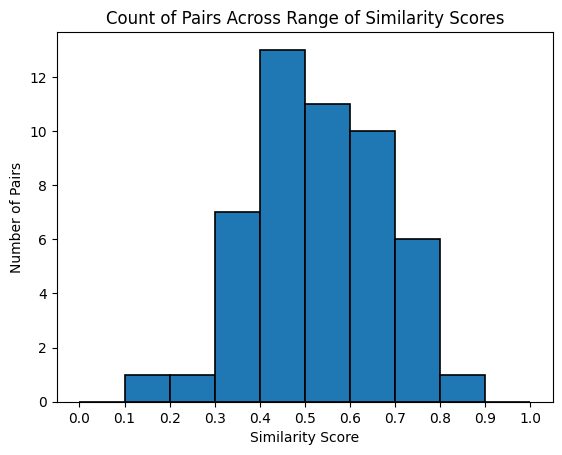

In [ ]:
import matplotlib.pyplot as plt

plt.hist(scores, bins = [0.1*i for i in range(11)], align = 'mid',  edgecolor='black', linewidth=1.2)
plt.xticks([0.1*i for i in range(11)])
plt.xlabel("Similarity Score")
plt.ylabel("Number of Pairs")
plt.title("Count of Pairs Across Range of Similarity Scores")
plt.show()